**Imports:**

In [1]:
import numpy as np
from types import SimpleNamespace
import time

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import ipywidgets as widgets

DO_PRINT = False

# Walras in Edgeworth with Cobb-Dogulas

In [2]:
def edgeworth_cobb_douglas(par,p1):
    
    # a. total endowment
    w1bar = par.w1A + par.w1B
    w2bar = par.w2A + par.w2B
    
    # b. figure set up
    fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
    ax_A = fig.add_subplot(1, 1, 1)
    
    ax_A.set_xlabel("$x_1^A$")
    ax_A.set_ylabel("$x_2^A$")

    temp = ax_A.twinx()
    temp.set_ylabel("$x_2^B$")
    ax_B = temp.twiny()
    ax_B.set_xlabel("$x_1^B$")
    ax_B.invert_xaxis()
    ax_B.invert_yaxis()
    
    # endowment
    ax_A.scatter(par.w1A,par.w2A,color='black')
    ax_A.text(par.w1A*1.05,par.w2A*1.05,f'endowment')
    
    # A
    mA = p1*par.w1A + par.w2A 
    x1A = par.a*mA/p1
    x2A = (1-par.a)*mA
    ax_A.scatter(x1A,x2A,marker='*',color=colors[0])
    ax_A.text(x1A*1.025,x2A*1.025,f'A',color=colors[0])
    
    x1A_vec = np.linspace(x1A*0.5,x1A*1.5,100)
    u = x1A**par.a*x2A**(1-par.a)
    ax_A.plot(x1A_vec,(u/x1A_vec**par.a)**(1/(1-par.a)),color=colors[0])
    
    # budgetline
    ax_A.plot([0,w1bar],[par.w2A+p1*par.w1A,par.w2A-p1*(w1bar-par.w1A)],color='black')
    
    # B
    mB = p1*par.w1B + par.w2B
    x1B = par.b*mB/p1
    x2B = (1-par.b)*mB
    ax_B.scatter(x1B,x2B,marker='*',color=colors[1])
    ax_B.text(x1B*1.07,x2B*1.07,f'B',color=colors[1])
    
    x1B_vec = np.linspace(x1B*0.5,x1B*1.5,100)
    u = x1B**par.b*x2B**(1-par.b)
    ax_B.plot(x1B_vec,(u/x1B_vec**par.b)**(1/(1-par.b)),color=colors[1])
    
    # limits
    ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
    ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
    ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
    ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')
    
    ax_A.set_xlim([-0.1, w1bar + 0.1])
    ax_A.set_ylim([-0.1, w2bar + 0.1])    
    ax_B.set_xlim([w1bar + 0.1, -0.1])
    ax_B.set_ylim([w2bar + 0.1, -0.1])
    
    fig.tight_layout()
    
# parameters
par = SimpleNamespace()
par.a = 0.5
par.b = 0.5
par.w1A = 0.5
par.w2A = 1.5
par.w1B = 1.5
par.w2B = 0.5

widgets.interact(lambda p1: edgeworth_cobb_douglas(par,p1),
    p1=widgets.FloatSlider(description='p1',min=0.1,max=5.0,step=0.05,value=0.5), 
);

interactive(children=(FloatSlider(value=0.5, description='p1', max=5.0, min=0.1, step=0.05), Output()), _dom_c…

# Pareto in Edgeworth with perfect substitutes and quasi-linear

In [8]:
def edgeworth_pareto(par,x1A,x2A,name=None):
    
    # a. total endowment
    w1bar = par.w1A + par.w1B
    w2bar = par.w2A + par.w2B
    
    # b. figure set up
    fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
    ax_A = fig.add_subplot(1, 1, 1)
    
    ax_A.set_xlabel("$x_1^A$")
    ax_A.set_ylabel("$x_2^A$")

    temp = ax_A.twinx()
    temp.set_ylabel("$x_2^B$")
    ax_B = temp.twiny()
    ax_B.set_xlabel("$x_1^B$")
    ax_B.invert_xaxis()
    ax_B.invert_yaxis()
    
    # A
    ax_A.scatter(x1A,x2A,marker='s',color='black',label='candidate point')
    
    x1_vec = np.linspace(1e-8,w1bar-1e-8,100)
    
    uA = x1A + x2A
    x2A_vec = uA - x1_vec
    ax_A.plot(x1_vec,x2A_vec,color=colors[0],label="A's indifference curve")
    ax_A.plot([],[],color=colors[1],label="B's indifference curve")
        
    # B
    x1B = w1bar-x1A
    x2B = w2bar-x2A

    uB = 4*np.log(x1B) + x2B
    x2B_vec = uB - 4*np.log(x1_vec)
    ax_B.plot(x1_vec,x2B_vec,color=colors[1])
    
    # cigar
    x2B_vec_flip = w2bar - np.flip(x2B_vec)
    I = x2B_vec_flip > x2A_vec
    ax_A.fill_between(x1_vec[I],x2A_vec[I],x2B_vec_flip[I],color='black',alpha=0.25,label='Pareto-improvements')
    
    # limits
    ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
    ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
    ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
    ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')
    
    ax_A.set_xlim([-0.1, w1bar + 0.1])
    ax_A.set_ylim([-0.1, w2bar + 0.1])    
    ax_B.set_xlim([w1bar + 0.1, -0.1])
    ax_B.set_ylim([w2bar + 0.1, -0.1])
    
    ax_A.legend(frameon=True)
    fig.tight_layout()
    
    if not name is None: fig.savefig(name)
    
# parameters
par = SimpleNamespace()
par.w1A = 6
par.w2A = 6
par.w1B = 6
par.w2B = 6


widgets.interact(lambda x1A,x2A: edgeworth_pareto(par,x1A,x2A),
    x1A=widgets.FloatSlider(description='x1A',min=0.0,max=12.0,step=0.05,value=2.0), 
    x2A=widgets.FloatSlider(description='x2A',min=0.0,max=12.0,step=0.05,value=3.0), 
);

interactive(children=(FloatSlider(value=2.0, description='x1A', max=12.0, step=0.05), FloatSlider(value=3.0, d…

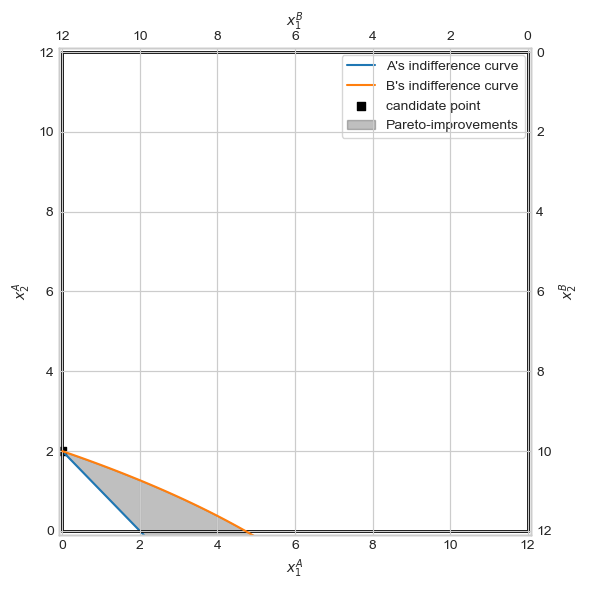

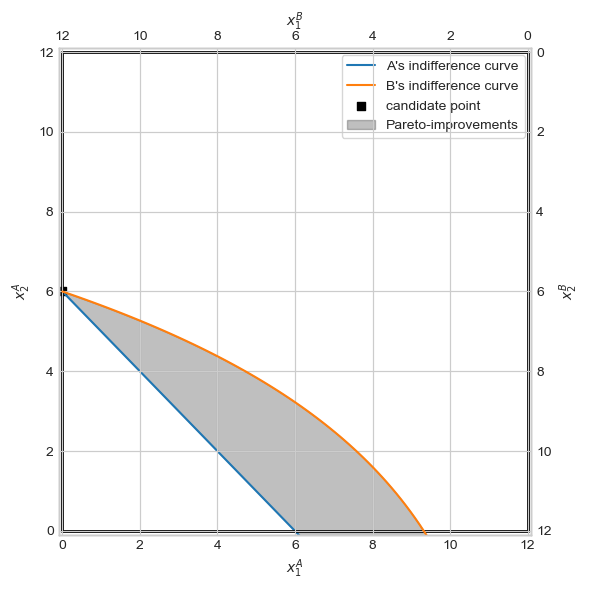

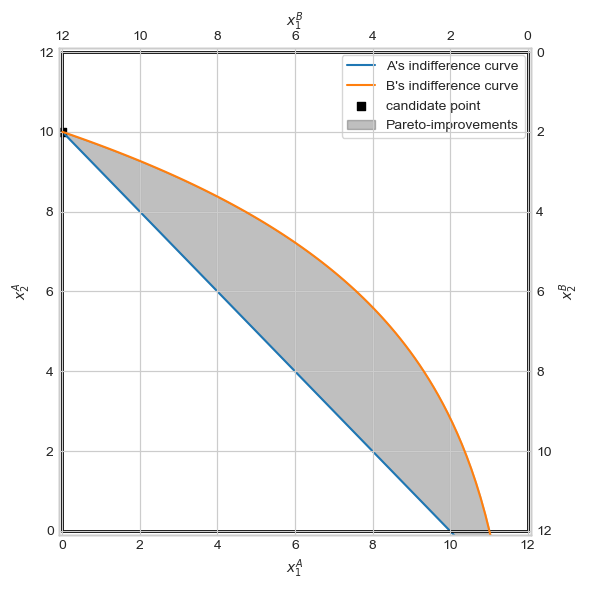

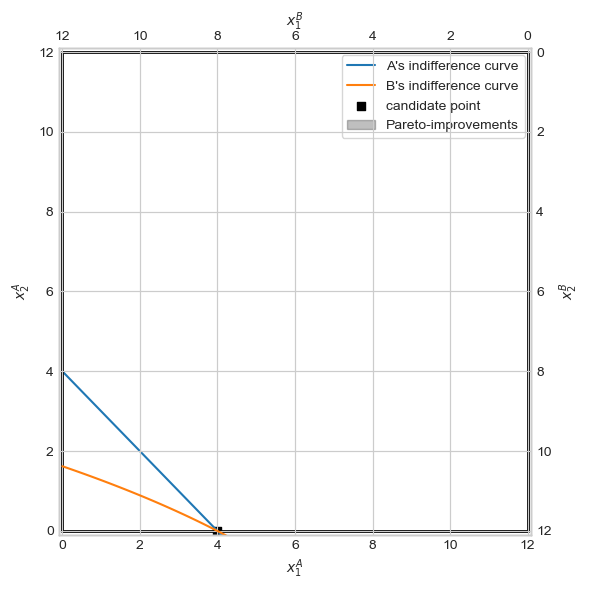

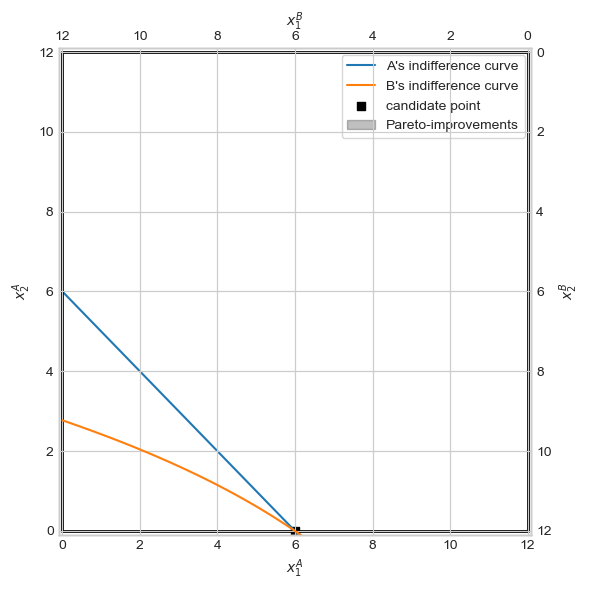

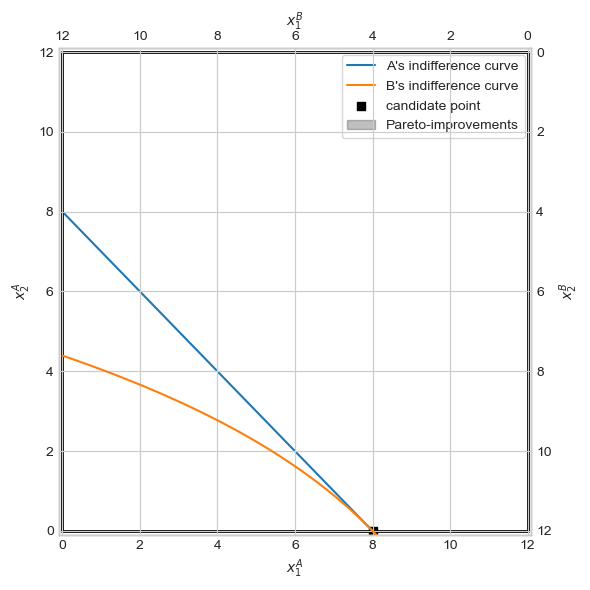

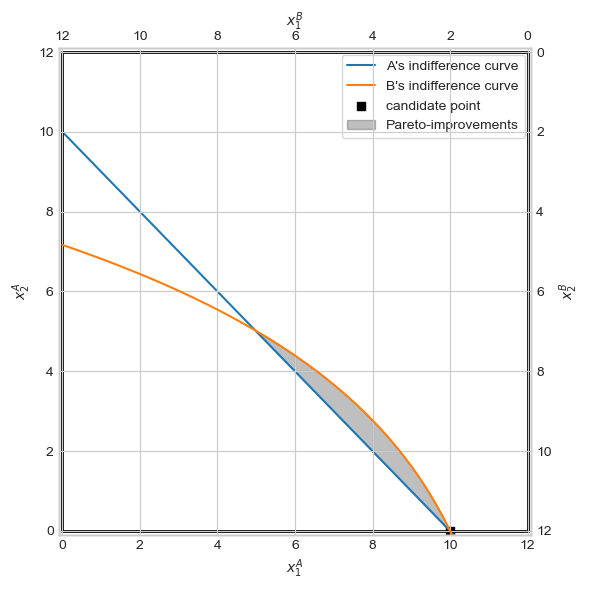

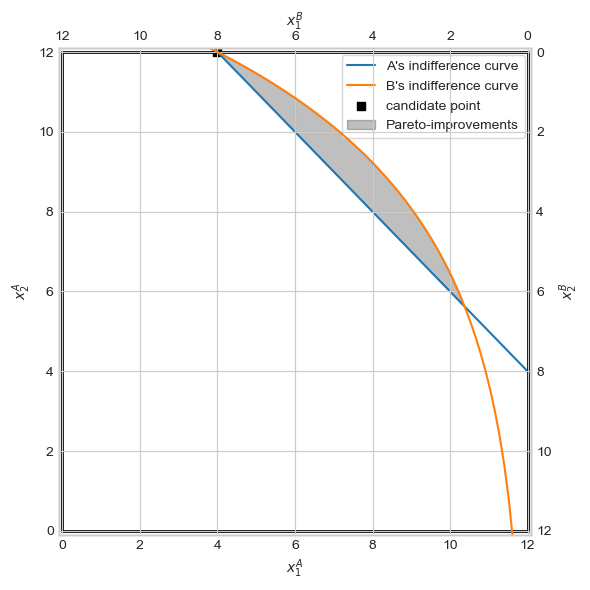

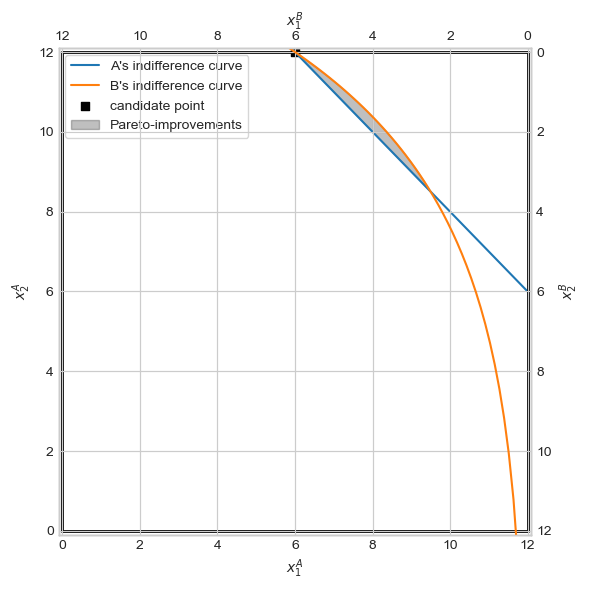

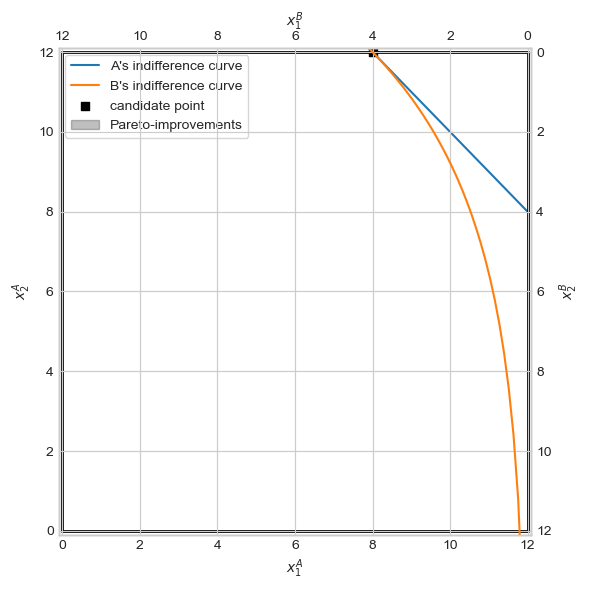

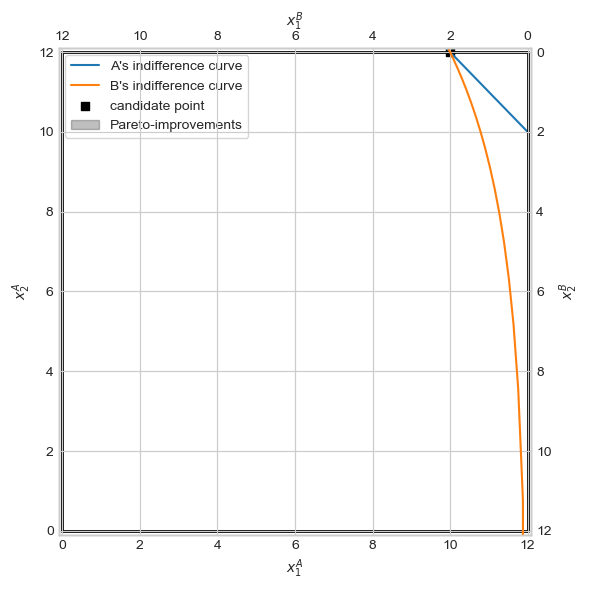

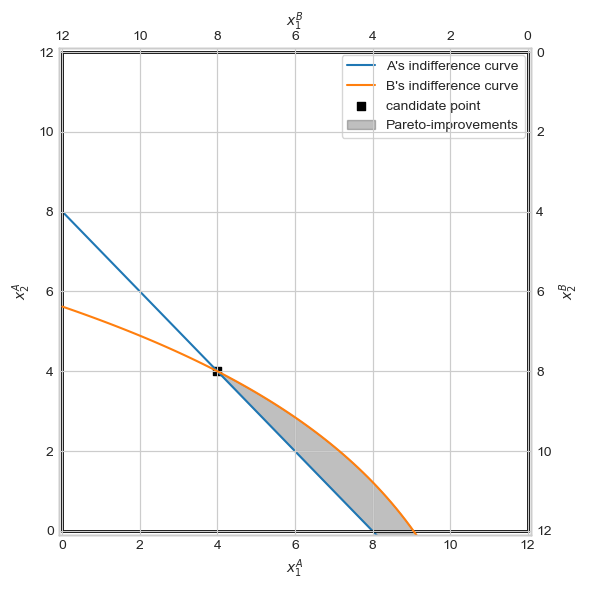

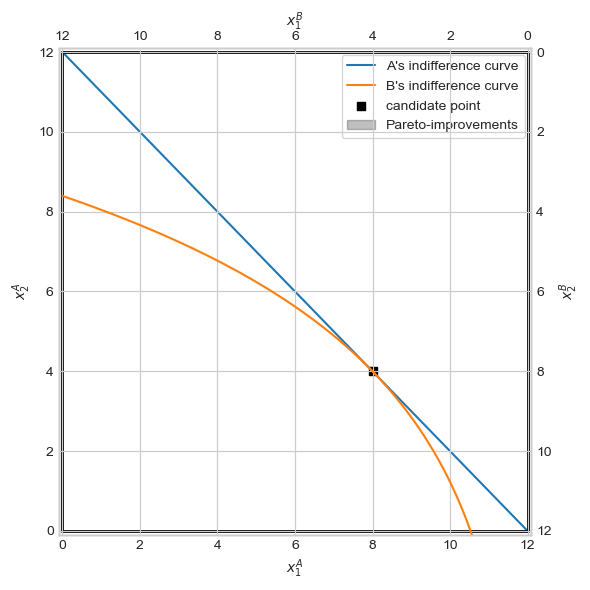

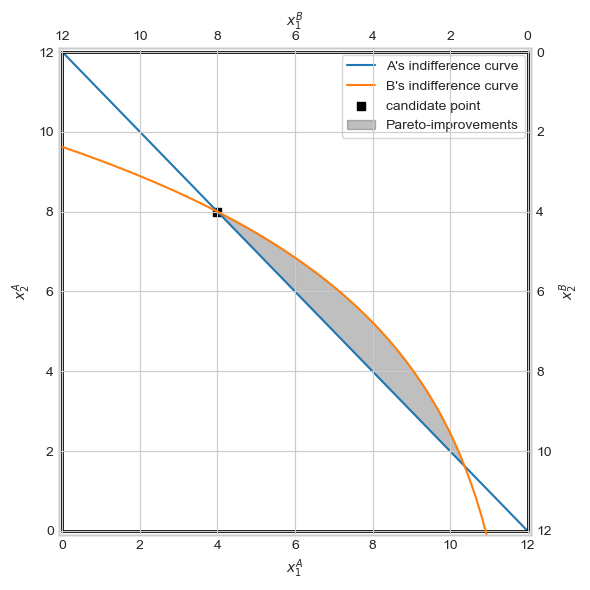

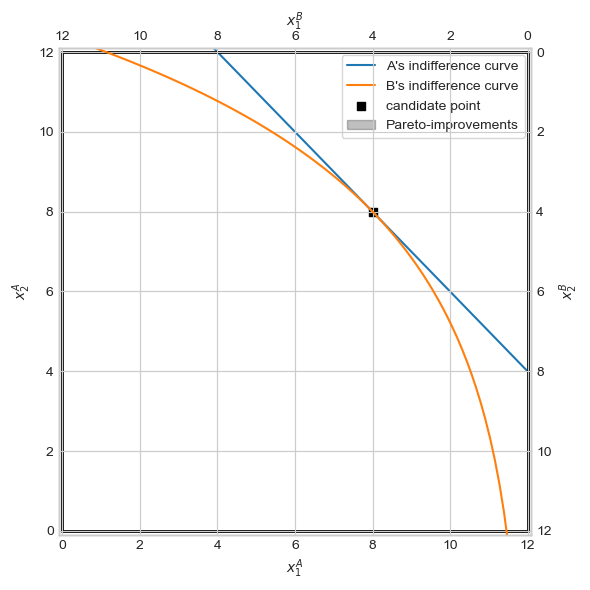

In [13]:
if DO_PRINT:
    
    for (x1A,x2A) in [(0,2),(0,6),(0,10)] + [(4,0),(6,0),(8,0),(10,0)] + [(4,12),(6,12),(8,12),(10,12)] + [(4,4),(8,4),(4,8),(8,8)]:
        edgeworth_pareto(par,x1A,x2A,name=f'contractcurve_{x1A}_{x2A}.pdf')
        

# Algorithmic solution

**Algorithm:**

In [5]:
def excess_demand_x2(p1,a):
    
    I = p1*k + 1
    x2 = (1-a)*I
    z2 = x2-1
    return z2

def iterate(p1_guess,N=10000,mu_1=0.25,mu_2=0.75,k=5,eps=1e-8, kappa=0.1,maxiter=50):

    # a. draw preferences
    a = np.random.uniform(low=mu_1,high=mu_2,size=N)
    
    # b. iterate
    t = 0
    while True:
    
        if t == 0:
            p1 = p1_guess
        else:
            p1 = p1 - kappa*z2/N
    
        z2 = np.sum(excess_demand_x2(p1,a))
        print(f'{t:3d}: p1 = {p1:12.8f} -> z2 -> {z2:14.8f}')
        time.sleep(1)
        
        if t >= maxiter or np.abs(z2) < eps:
            break
        t += 1
    

**Run:**

In [6]:
# a. settings
N = 10000
mu_1 = 0.25
mu_2 = 0.75
k = 5
eps = 1e-8
kappa = 0.5
p1_guess = 0.24

# b. analytical solution
mu = mu_1 + (mu_2-mu_1)/2
p1_analytical = (mu/(1-mu))/k
print(f'analytical result: p1 = {p1_analytical:.8f}')

# c. algorithmic solution
p1_guess = p1_analytical*1.2
iterate(p1_guess,N,mu_1,mu_2,k,eps,kappa)

analytical result: p1 = 0.20000000
  0: p1 =   0.24000000 -> z2 ->  1051.46389974
  1: p1 =   0.18742681 -> z2 ->  -269.01511501
  2: p1 =   0.20087756 -> z2 ->    68.82702499
  3: p1 =   0.19743621 -> z2 ->   -17.60926842
  4: p1 =   0.19831667 -> z2 ->     4.50529911
  5: p1 =   0.19809141 -> z2 ->    -1.15267253
  6: p1 =   0.19814904 -> z2 ->     0.29490916
  7: p1 =   0.19813430 -> z2 ->    -0.07545197
  8: p1 =   0.19813807 -> z2 ->     0.01930425
  9: p1 =   0.19813710 -> z2 ->    -0.00493896
 10: p1 =   0.19813735 -> z2 ->     0.00126362
 11: p1 =   0.19813729 -> z2 ->    -0.00032330
 12: p1 =   0.19813730 -> z2 ->     0.00008271
 13: p1 =   0.19813730 -> z2 ->    -0.00002116
 14: p1 =   0.19813730 -> z2 ->     0.00000541
 15: p1 =   0.19813730 -> z2 ->    -0.00000139
 16: p1 =   0.19813730 -> z2 ->     0.00000035
 17: p1 =   0.19813730 -> z2 ->    -0.00000009
 18: p1 =   0.19813730 -> z2 ->     0.00000002
 19: p1 =   0.19813730 -> z2 ->    -0.00000001
